In [1]:
import numpy as np
import pickle
np.random.seed(7)  # for reproducibility


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2


Using TensorFlow backend.


In [3]:
import keras
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('tf')

In [4]:
import matplotlib.pyplot as plt
import os
import numpy

In [5]:
def unpickle(file):
    with open(file,'rb') as fo:
        dict=pickle.load(fo, encoding='bytes')
    data=dict['data']
    data = data.reshape((-1, 32, 32, 3))
    labels=dict['label']
    return data, labels

In [6]:
def saveTest(your_predict_labels):
    f=open('testlabel.pickle','rb')
    labels=pickle.load(f)
    f.close()
  #here you must replace the labels that you have predicted for the test set:
    for i in range(len(labels)):
        labels[i]=your_predict_labels[i]
  #save the pickle file that you should upload:
    f=open('testlabel.pickle','wb')
    pickle.dump(labels,f)
    f.close()

In [7]:
X_train_label, Y_train_label =unpickle("trainset.pickle")
print(X_train_label.shape)

(9000, 32, 32, 3)


In [8]:
X_validation_label, Y_validation_label=unpickle("validset.pickle")

In [9]:
f=open('testset.pickle','rb')
dict=pickle.load(f)
f.close()
X_test_label=dict['data']
X_test_label = X_test_label.reshape((-1, 32, 32, 3))
X_test = X_test_label.astype('float32')

print(X_test_label.shape)

(3000, 32, 32, 3)


In [10]:
f=open('testlabel.pickle','rb')
Y_test_label=pickle.load(f)
f.close()
Y_test=np_utils.to_categorical(Y_test_label, 10)


In [11]:
X_train = X_train_label.astype('float32')
X_validation = X_validation_label.astype('float32')


Y_train = np_utils.to_categorical(Y_train_label, 10)
Y_validation = np_utils.to_categorical(Y_validation_label, 10)
print(X_train.shape)

(9000, 32, 32, 3)


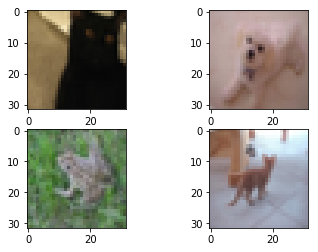

In [14]:
#image visualization
for i in range(4):
    img=X_train_label[i]
    img=img.reshape(-1,32,32).transpose([1,2,0])
    plt.subplot(2,2,i+1)
    plt.imshow(img)


In [15]:
# Parameter
num_classes = Y_train.shape[1]
batch_size = 64
epochs = 100
no_estimators = 5

In [16]:
# create CNN 6 conv layer & 2 Maxpooling layer
def create_cnn_model():
    model = Sequential()
    model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3), activation='relu', border_mode='same'))
    model.add(BatchNormalization())    
    model.add(Dropout(0.2))
    model.add(Convolution2D(32, 3, 3, activation='relu', border_mode='same'))
    
    model.add(BatchNormalization())
    model.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same'))

    model.add(BatchNormalization())
    model.add(Convolution2D(128, 3, 3, activation='relu', border_mode='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Convolution2D(128, 3, 3, activation='relu', border_mode='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Flatten())
    
    model.add(Dropout(0.2))
    model.add(Dense(1024, activation='relu', W_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu', W_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
    return model

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  after removing the cwd from sys.path.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", padding="same")`
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Kera

Instructions for updating:
Use tf.cast instead.


C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 14s - loss: 10.2234 - acc: 0.4644 - val_loss: 2.4632 - val_acc: 0.5327
Epoch 2/100
 - 4s - loss: 1.8847 - acc: 0.5539 - val_loss: 2.7019 - val_acc: 0.5383
Epoch 3/100
 - 4s - loss: 1.4862 - acc: 0.5927 - val_loss: 1.6713 - val_acc: 0.5630
Epoch 4/100
 - 4s - loss: 1.3906 - acc: 0.6170 - val_loss: 1.5054 - val_acc: 0.5253
Epoch 5/100
 - 4s - loss: 1.3228 - acc: 0.6309 - val_loss: 1.6114 - val_acc: 0.5447
Epoch 6/100
 - 4s - loss: 1.2802 - acc: 0.6587 - val_loss: 1.2880 - val_acc: 0.6300
Epoch 7/100
 - 4s - loss: 1.1965 - acc: 0.6687 - val_loss: 1.1895 - val_acc: 0.6270
Epoch 8/100
 - 4s - loss: 1.1531 - acc: 0.6853 - val_loss: 1.2043 - val_acc: 0.6403
Epoch 9/100
 - 4s - loss: 1.1356 - acc: 0.6980 - val_loss: 1.2458 - val_acc: 0.6443
Epoch 10/100
 - 4s - loss: 1.1233 - acc: 0.7041 - val_loss: 1.1954 - val_acc: 0.6240
Epoch 11/100
 - 4s - loss: 1.0454 - acc: 0.7204 - val_loss: 1.2298 - val_acc: 0.6623
Epoch 12/100
 - 4s - los

Epoch 97/100
 - 4s - loss: 0.2048 - acc: 0.9740 - val_loss: 1.4167 - val_acc: 0.7017
Epoch 98/100
 - 4s - loss: 0.1999 - acc: 0.9733 - val_loss: 1.5155 - val_acc: 0.7037
Epoch 99/100
 - 4s - loss: 0.1958 - acc: 0.9733 - val_loss: 1.6096 - val_acc: 0.7100
Epoch 100/100
 - 4s - loss: 0.1944 - acc: 0.9741 - val_loss: 1.4505 - val_acc: 0.7143
3000/3000 [==============================] - 1s 182us/step

Test Accuracy: 0.8123


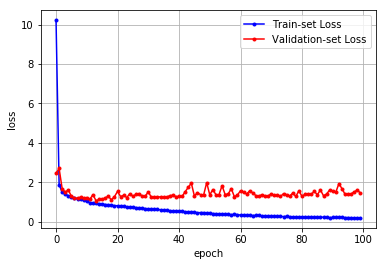

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 10s - loss: 10.5367 - acc: 0.4684 - val_loss: 3.0272 - val_acc: 0.4503
Epoch 2/100
 - 4s - loss: 1.8367 - acc: 0.5577 - val_loss: 1.8903 - val_acc: 0.4653
Epoch 3/100
 - 4s - loss: 1.4529 - acc: 0.5976 - val_loss: 1.3229 - val_acc: 0.5743
Epoch 4/100
 - 4s - loss: 1.3985 - acc: 0.6140 - val_loss: 1.5017 - val_acc: 0.5483
Epoch 5/100
 - 4s - loss: 1.3186 - acc: 0.6329 - val_loss: 1.4215 - val_acc: 0.5927
Epoch 6/100
 - 4s - loss: 1.2519 - acc: 0.6532 - val_loss: 1.3554 - val_acc: 0.5947
Epoch 7/100
 - 4s - loss: 1.2358 - acc: 0.6651 - val_loss: 2.5848 - val_acc: 0.5283
Epoch 8/100
 - 4s - loss: 1.1767 - acc: 0.6646 - val_loss: 1.2913 - val_acc: 0.6133
Epoch 9/100
 - 4s - loss: 1.1048 - acc: 0.6908 - val_loss: 1.1277 - val_acc: 0.6527
Epoch 10/100
 - 4s - loss: 1.0533 - acc: 0.7048 - val_loss: 1.1861 - val_acc: 0.6623
Epoch 11/100
 - 4s - loss: 0.9709 - acc: 0.7224 - val_loss: 1.0231 - val_acc: 0.6813
Epoch 12/100
 - 4s - los

Epoch 97/100
 - 4s - loss: 0.1989 - acc: 0.9717 - val_loss: 1.4604 - val_acc: 0.7183
Epoch 98/100
 - 4s - loss: 0.1972 - acc: 0.9707 - val_loss: 1.3967 - val_acc: 0.6860
Epoch 99/100
 - 4s - loss: 0.2046 - acc: 0.9711 - val_loss: 1.4402 - val_acc: 0.6987
Epoch 100/100
 - 4s - loss: 0.1975 - acc: 0.9726 - val_loss: 1.3806 - val_acc: 0.7053
3000/3000 [==============================] - 1s 181us/step

Test Accuracy: 0.7930


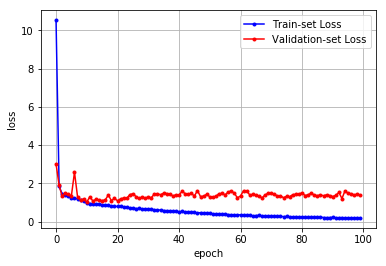

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 10s - loss: 10.8571 - acc: 0.4798 - val_loss: 3.7218 - val_acc: 0.4830
Epoch 2/100
 - 4s - loss: 1.8821 - acc: 0.5487 - val_loss: 1.5858 - val_acc: 0.5597
Epoch 3/100
 - 4s - loss: 1.4610 - acc: 0.5840 - val_loss: 1.4058 - val_acc: 0.5823
Epoch 4/100
 - 4s - loss: 1.3449 - acc: 0.6110 - val_loss: 1.5149 - val_acc: 0.4427
Epoch 5/100
 - 4s - loss: 1.2968 - acc: 0.6334 - val_loss: 1.4313 - val_acc: 0.5720
Epoch 6/100
 - 4s - loss: 1.2229 - acc: 0.6559 - val_loss: 1.4976 - val_acc: 0.5053
Epoch 7/100
 - 4s - loss: 1.1789 - acc: 0.6612 - val_loss: 1.9525 - val_acc: 0.3777
Epoch 8/100
 - 4s - loss: 1.1267 - acc: 0.6818 - val_loss: 1.1755 - val_acc: 0.6383
Epoch 9/100
 - 4s - loss: 1.0673 - acc: 0.6903 - val_loss: 1.1934 - val_acc: 0.6390
Epoch 10/100
 - 4s - loss: 1.0241 - acc: 0.7110 - val_loss: 1.0720 - val_acc: 0.6880
Epoch 11/100
 - 4s - loss: 0.9676 - acc: 0.7298 - val_loss: 1.2974 - val_acc: 0.5710
Epoch 12/100
 - 4s - los

Epoch 97/100
 - 4s - loss: 0.1883 - acc: 0.9758 - val_loss: 1.4798 - val_acc: 0.7077
Epoch 98/100
 - 4s - loss: 0.2062 - acc: 0.9697 - val_loss: 1.5120 - val_acc: 0.7130
Epoch 99/100
 - 4s - loss: 0.1957 - acc: 0.9731 - val_loss: 1.5462 - val_acc: 0.6897
Epoch 100/100
 - 4s - loss: 0.1859 - acc: 0.9740 - val_loss: 1.5331 - val_acc: 0.7047
3000/3000 [==============================] - 0s 166us/step

Test Accuracy: 0.7917


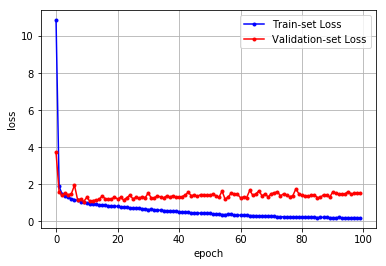

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 10s - loss: 10.6068 - acc: 0.4673 - val_loss: 3.9243 - val_acc: 0.4040
Epoch 2/100
 - 4s - loss: 1.8638 - acc: 0.5568 - val_loss: 1.5700 - val_acc: 0.5500
Epoch 3/100
 - 4s - loss: 1.4657 - acc: 0.5860 - val_loss: 1.7149 - val_acc: 0.4737
Epoch 4/100
 - 4s - loss: 1.3758 - acc: 0.6104 - val_loss: 1.3220 - val_acc: 0.5810
Epoch 5/100
 - 4s - loss: 1.3293 - acc: 0.6200 - val_loss: 1.1454 - val_acc: 0.6203
Epoch 6/100
 - 4s - loss: 1.2624 - acc: 0.6383 - val_loss: 1.5633 - val_acc: 0.5897
Epoch 7/100
 - 4s - loss: 1.1837 - acc: 0.6632 - val_loss: 1.2830 - val_acc: 0.6510
Epoch 8/100
 - 4s - loss: 1.1343 - acc: 0.6789 - val_loss: 1.1188 - val_acc: 0.6510
Epoch 9/100
 - 4s - loss: 1.1118 - acc: 0.6829 - val_loss: 1.0892 - val_acc: 0.6730
Epoch 10/100
 - 4s - loss: 1.0402 - acc: 0.7011 - val_loss: 1.1072 - val_acc: 0.6647
Epoch 11/100
 - 4s - loss: 1.0006 - acc: 0.7194 - val_loss: 1.1278 - val_acc: 0.6580
Epoch 12/100
 - 4s - los

Epoch 97/100
 - 4s - loss: 0.1996 - acc: 0.9728 - val_loss: 1.4490 - val_acc: 0.7140
Epoch 98/100
 - 4s - loss: 0.1947 - acc: 0.9724 - val_loss: 1.3658 - val_acc: 0.7247
Epoch 99/100
 - 4s - loss: 0.2034 - acc: 0.9721 - val_loss: 1.2493 - val_acc: 0.7300
Epoch 100/100
 - 4s - loss: 0.2045 - acc: 0.9688 - val_loss: 1.6477 - val_acc: 0.6907
3000/3000 [==============================] - 0s 160us/step

Test Accuracy: 0.7887


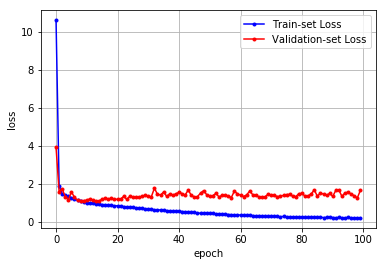

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 10s - loss: 10.4745 - acc: 0.4618 - val_loss: 3.1202 - val_acc: 0.5233
Epoch 2/100
 - 4s - loss: 1.8284 - acc: 0.5560 - val_loss: 1.6511 - val_acc: 0.5050
Epoch 3/100
 - 4s - loss: 1.4206 - acc: 0.5911 - val_loss: 1.2794 - val_acc: 0.6187
Epoch 4/100
 - 4s - loss: 1.3316 - acc: 0.6143 - val_loss: 1.2617 - val_acc: 0.5677
Epoch 5/100
 - 4s - loss: 1.2774 - acc: 0.6314 - val_loss: 1.5245 - val_acc: 0.6043
Epoch 6/100
 - 4s - loss: 1.2189 - acc: 0.6507 - val_loss: 1.3592 - val_acc: 0.6097
Epoch 7/100
 - 4s - loss: 1.1462 - acc: 0.6683 - val_loss: 1.2429 - val_acc: 0.6187
Epoch 8/100
 - 4s - loss: 1.1028 - acc: 0.6857 - val_loss: 1.2873 - val_acc: 0.5867
Epoch 9/100
 - 4s - loss: 1.0647 - acc: 0.6977 - val_loss: 1.0425 - val_acc: 0.6910
Epoch 10/100
 - 4s - loss: 1.0268 - acc: 0.7193 - val_loss: 1.0179 - val_acc: 0.6997
Epoch 11/100
 - 4s - loss: 0.9786 - acc: 0.7332 - val_loss: 1.0921 - val_acc: 0.6493
Epoch 12/100
 - 4s - los

Epoch 97/100
 - 4s - loss: 0.1926 - acc: 0.9706 - val_loss: 1.3808 - val_acc: 0.7250
Epoch 98/100
 - 4s - loss: 0.1856 - acc: 0.9746 - val_loss: 1.5679 - val_acc: 0.7167
Epoch 99/100
 - 4s - loss: 0.1968 - acc: 0.9710 - val_loss: 1.4180 - val_acc: 0.7247
Epoch 100/100
 - 4s - loss: 0.1947 - acc: 0.9718 - val_loss: 1.4993 - val_acc: 0.7040
3000/3000 [==============================] - 1s 168us/step

Test Accuracy: 0.8107


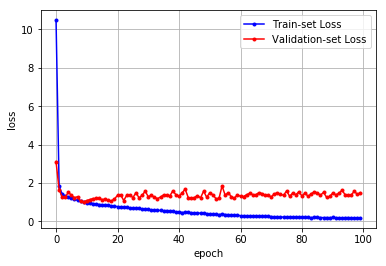

In [17]:
## ENSEMBLE MODELS
# Train many CNN models
for i in np.arange(no_estimators):
    # check point to save best model
    checkpoint = keras.callbacks.ModelCheckpoint('models_5/model_'+str(i)+'.h5', monitor='val_acc', \
            verbose=0, save_best_only=True, save_weights_only=True, mode='auto')
    # clear GPU memory
    model = None
    K.clear_session()
    
    # train model
    model = create_cnn_model()
    history=model.fit(X_train, Y_train, validation_data=(X_validation, Y_validation), nb_epoch=100, \
                batch_size=64, verbose=2, callbacks=[checkpoint])
    print("\nTest Accuracy: {:.4f}".format(model.evaluate(X_test, Y_test)[1]))
    y_vloss=history.history['val_loss']
    y_loss=history.history['loss']
    
    x_len=numpy.arange(len(y_loss))
    plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
    plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
    
    plt.legend(loc='upper right')
    plt.grid()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

In [19]:
# Check individual scores - val_acc and get list of the best models
score_list = []
score_list2 = []
score_list3=[]
model = create_cnn_model()
for i in np.arange(no_estimators):    
    model.load_weights('models_5/model_'+str(i)+'.h5')
    scores3= model.evaluate(X_test, Y_test, verbose=0)
    scores2= model.evaluate(X_train, Y_train, verbose=0)
    scores = model.evaluate(X_validation, Y_validation, verbose=0)
    score_list.append(scores[1])   #validation Acc
    score_list2.append(scores2[1])    #Train Acc
    score_list3.append(scores3[1])  #Test Acc
score_list = np.array(score_list)
score_list2= np.array(score_list2)
score_list3= np.array(score_list3)
score_list_filter = score_list >= 0.73 # threshold to select best model
print("Train Acc: "+str(score_list2))
print("Validation Acc: "+ str(score_list))
print("Test Acc: "+ str(score_list3))

print(score_list_filter)

C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  after removing the cwd from sys.path.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_l

Train Acc: [0.99777778 0.99844444 0.99744444 0.997      0.99488889]
Validation Acc: [0.72966667 0.72966667 0.72766667 0.73       0.73666667]
Test Acc: [0.799      0.81666667 0.81933333 0.79533333 0.81      ]
[False False False  True  True]


In [20]:
# Ensemble predictions ~ val_err 16%
predictions = np.zeros((Y_validation.shape[0],Y_validation.shape[1]))
predictions_test=np.zeros((Y_test.shape[0],Y_test.shape[1]))
model = create_cnn_model()
for i in np.arange(no_estimators): 
    if score_list_filter[i] == False:
        continue
    #validation
    model.load_weights('models_5/model_'+str(i)+'.h5')
    prediction = model.predict_classes(X_validation, batch_size=200, verbose=0)
    prediction_onehot = np_utils.to_categorical(prediction, 10)
    predictions = predictions + prediction_onehot*score_list[i]
    #Test
    prediction_test = model.predict_classes(X_test, batch_size=200, verbose=0)
    prediction_onehot_test = np_utils.to_categorical(prediction_test, 10)
    predictions_test = predictions_test + prediction_onehot_test*score_list3[i]

predictions_label = np.argmax(predictions, axis=1)
evaluate = np.equal(predictions_label, Y_validation_label)

predictions_label_test = np.argmax(predictions_test, axis=1)
evaluate_test = np.equal(predictions_label_test, Y_test_label)

print("Ensemble Validation_Error: %.2f%%" % (100-np.mean(evaluate)*100))
print("Ensemble Validation_Accuracy: %.2f%%" % (np.mean(evaluate)*100))

print("Ensemble Test_Error: %.2f%%" % (100-np.mean(evaluate_test)*100))
print("Ensemble Test_Accuracy: %.2f%%" % (np.mean(evaluate_test)*100))

C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  after removing the cwd from sys.path.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_l

Ensemble Validation_Error: 26.33%
Ensemble Validation_Accuracy: 73.67%
Ensemble Test_Error: 19.00%
Ensemble Test_Accuracy: 81.00%


In [ ]:
## PERFORM PREDICTION ON TEST SET

X_test = X_test_label.astype('float32')

predictions = np.zeros((Y_validation.shape[0],Y_validation.shape[1]))
model = create_cnn_model()
for i in np.arange(no_estimators): 
    if score_list_filter[i] == False: # skip bad model
        continue
    model.load_weights('models_5/model_'+str(i)+'.h5')
    prediction = model.predict_classes(X_test, batch_size=200, verbose=0)
    prediction_onehot = np_utils.to_categorical(prediction, 10)
    predictions = predictions + prediction_onehot*score_list[i]

predictions_label = np.argmax(predictions, axis=1)
output = predictions_label.tolist()

with open('testlabel.pickle','wb') as f:
    pickle.dump(output, f)

pred = model.evaluate(X_test, Y_test)
print("test loss: ",pred[0]+"test acc: ",pred[1])